In [2]:
import json
import pandas as pd
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt 
import unicodedata
import statsmodels.api as sm
import seaborn as sns
import winsound

C:\Users\luism\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
balanceo= "/Users/luism/Desktop/Phyton/Trabajo_econometria7.xls"

In [4]:
columns1= ['Clave_de_entidad',
          'Entidad_federativa',
          'Clave_del_minicipio',
           'Municipio',
          'Pobreza_2015%',
          'Población_2020',
          'Vivienda_jefatura_femenina%',
          'Desocupación',
           'Años_escolaridad_promedio_2015',
          'Casos_feminicidio_100mil habitantes',
          'Y']


In [5]:
modelo=pd.read_excel(balanceo)
modelo



,clave_entidad,entidad_federativa,clave_municipio,municipio,pobreza,pob,Viviendas con jefe(a) del hogar mujer_tasa,Desempleo,Años de escolaridad promedio,Casos de feminicidio total_tasa,Y
0,1,Aguascalientes,1001,Aguascalientes,26.1,877190,27.826717,3.9,10.218263,0.570002,0
1,1,Aguascalientes,1002,Asientos,54.0,46464,22.054325,5.8,7.848674,2.152204,0
2,1,Aguascalientes,1003,Calvillo,56.8,56048,25.595826,3.7,7.457012,0.000000,0
3,1,Aguascalientes,1004,Cosío,43.2,15577,21.170787,5.0,8.565525,0.000000,0
4,1,Aguascalientes,1005,Jesús María,25.0,120405,19.892083,2.4,9.464593,2.491591,0
...,...,...,...,...,...,...,...,...,...,...,...
2452,32,Zacatecas,32054,Villa Hidalgo,71.8,19155,17.037195,4.7,7.538700,0.000000,0
2453,32,Zacatecas,32055,Villanueva,61.0,30240,23.027014,9.3,7.376544,3.306878,1
2454,32,Zacatecas,32056,Zacatecas,25.9,146147,30.216721,4.2,11.245040,2.736970,0
2455,32,Zacatecas,32057,Trancoso,63.1,19413,19.346110,5.6,7.951075,0.000000,0


In [6]:
modelo.columns=columns1
modelo

,Clave_de_entidad,Entidad_federativa,Clave_del_minicipio,Municipio,Pobreza_2015%,Población_2020,Vivienda_jefatura_femenina%,Desocupación,Años_escolaridad_promedio_2015,Casos_feminicidio_100mil habitantes,Y
0,1,Aguascalientes,1001,Aguascalientes,26.1,877190,27.826717,3.9,10.218263,0.570002,0
1,1,Aguascalientes,1002,Asientos,54.0,46464,22.054325,5.8,7.848674,2.152204,0
2,1,Aguascalientes,1003,Calvillo,56.8,56048,25.595826,3.7,7.457012,0.000000,0
3,1,Aguascalientes,1004,Cosío,43.2,15577,21.170787,5.0,8.565525,0.000000,0
4,1,Aguascalientes,1005,Jesús María,25.0,120405,19.892083,2.4,9.464593,2.491591,0
...,...,...,...,...,...,...,...,...,...,...,...
2452,32,Zacatecas,32054,Villa Hidalgo,71.8,19155,17.037195,4.7,7.538700,0.000000,0
2453,32,Zacatecas,32055,Villanueva,61.0,30240,23.027014,9.3,7.376544,3.306878,1
2454,32,Zacatecas,32056,Zacatecas,25.9,146147,30.216721,4.2,11.245040,2.736970,0
2455,32,Zacatecas,32057,Trancoso,63.1,19413,19.346110,5.6,7.951075,0.000000,0


In [7]:
datos= modelo[['Clave_del_minicipio','Pobreza_2015%','Población_2020','Vivienda_jefatura_femenina%','Desocupación','Años_escolaridad_promedio_2015']]
datos.describe()
datos.var()

Clave_del_minicipio               5.417822e+07
Pobreza_2015%                     4.795483e+02
Población_2020                    1.933764e+10
Vivienda_jefatura_femenina%       3.153528e+01
Desocupación                      1.586873e+01
Años_escolaridad_promedio_2015    2.497177e+00
dtype: float64

In [8]:
modelo.to_excel("/Users/luism/Desktop/Phyton/Trabajo_econometria_final.xls")

In [9]:
Y= modelo['Y']
X= modelo[['Pobreza_2015%'.format(),
           'Vivienda_jefatura_femenina%'.format(),
           'Desocupación'.format(),
           'Años_escolaridad_promedio_2015'.format()]] #recordar el espacio

X=sm.add_constant(X)
model=sm.Logit(Y,X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.537443
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 2457
Model:                          Logit   Df Residuals:                     2452
Method:                           MLE   Df Model:                            4
Date:                Sat, 23 May 2020   Pseudo R-squ.:                 0.03868
Time:                        19:57:07   Log-Likelihood:                -1320.5
converged:                       True   LL-Null:                       -1373.6
Covariance Type:            nonrobust   LLR p-value:                 4.532e-22
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0791      0.445     -2.425     

In [10]:
Y_hat_ps = model.predict(X)


Text(0.5, 0, 'Y_hat_ps')

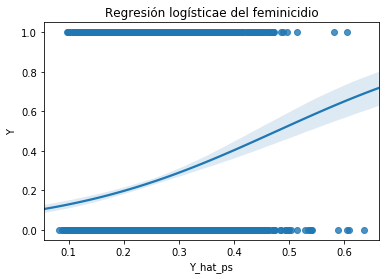

In [11]:
sns.regplot(x=Y_hat_ps, y=modelo["Y"], data=modelo, logistic=True)
plt.title("Regresión logísticae del feminicidio")
plt.ylabel('Y')
plt.xlabel('Y_hat_ps')

In [12]:
Y_hat_ps

0       0.424534
1       0.260314
2       0.262367
3       0.298182
4       0.363647
          ...   
2452    0.177226
2453    0.246075
2454    0.453119
2455    0.216724
2456    0.244092
Length: 2457, dtype: float64

## Histohrama pobreza

(array([1709.,  229.,  159.,  107.]),
 array([0, 2, 4, 6, 8]),
 <a list of 4 Patch objects>)

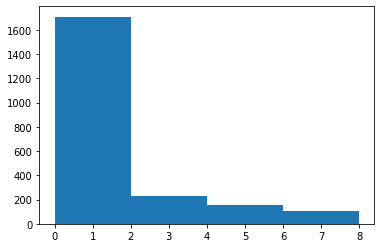

In [13]:
plt.hist(modelo['Casos_feminicidio_100mil habitantes'],bins=[0,2,4,6,8])


(array([ 23.,  46., 102., 185., 261., 340., 355., 434., 345., 366.]),
 array([ 0.  ,  9.99, 19.98, 29.97, 39.96, 49.95, 59.94, 69.93, 79.92,
        89.91, 99.9 ]),
 <a list of 10 Patch objects>)

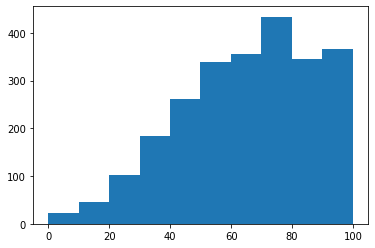

In [14]:
plt.hist(modelo['Pobreza_2015%'])


## Viviendas con jefe(a) del hogar mujer_tasa

(array([  7.,  65., 244., 568., 702., 529., 244.,  71.,  24.,   3.]),
 array([ 7.56013746, 11.65560886, 15.75108026, 19.84655167, 23.94202307,
        28.03749447, 32.13296587, 36.22843728, 40.32390868, 44.41938008,
        48.51485149]),
 <a list of 10 Patch objects>)

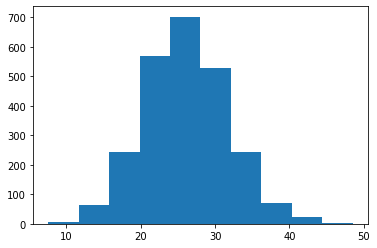

In [15]:
plt.hist(modelo['Vivienda_jefatura_femenina%'])



## Histograma Desempleo

(array([1.758e+03, 5.520e+02, 9.700e+01, 3.000e+01, 7.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0.  ,  5.19, 10.38, 15.57, 20.76, 25.95, 31.14, 36.33, 41.52,
        46.71, 51.9 ]),
 <a list of 10 Patch objects>)

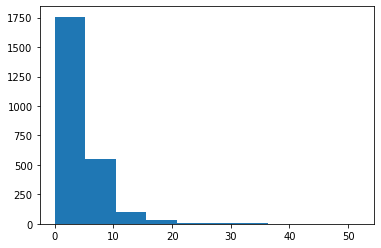

In [16]:
plt.hist(modelo['Desocupación'])


## Histograma Años de escolaridad promedio 

(array([ 11.,   0.,  29., 268., 829., 779., 386., 131.,  21.,   3.]),
 array([ 0.        ,  1.38622994,  2.77245989,  4.15868983,  5.54491977,
         6.93114972,  8.31737966,  9.70360961, 11.08983955, 12.47606949,
        13.86229944]),
 <a list of 10 Patch objects>)

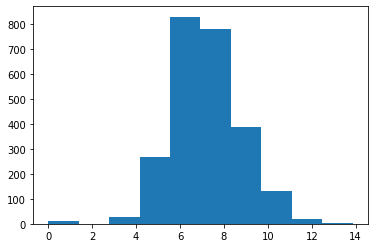

In [17]:
plt.hist(modelo['Años_escolaridad_promedio_2015'])


## Histograma Y

(array([1850.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         607.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

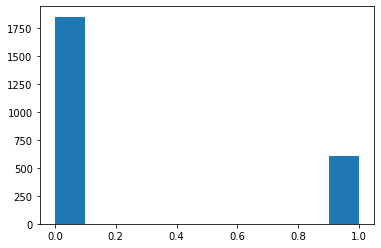

In [18]:
plt.hist(modelo['Y'])

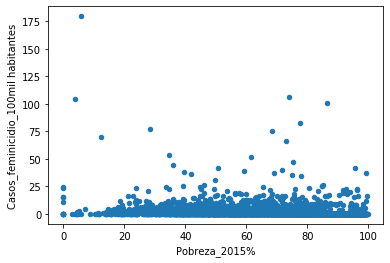

In [19]:
modelo.plot(kind="scatter",x='Pobreza_2015%',y='Casos_feminicidio_100mil habitantes') 




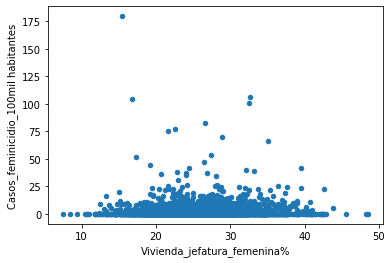

In [20]:
modelo.plot(kind="scatter",x='Vivienda_jefatura_femenina%',y='Casos_feminicidio_100mil habitantes')


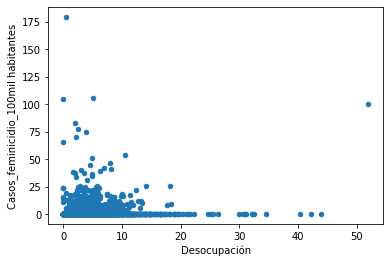

In [21]:
modelo.plot(kind="scatter",x='Desocupación',y='Casos_feminicidio_100mil habitantes')


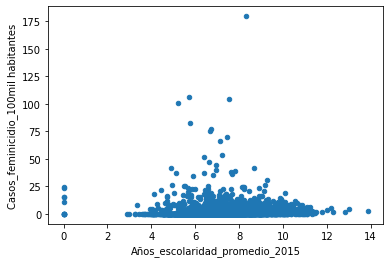

In [22]:
modelo.plot(kind="scatter",x='Años_escolaridad_promedio_2015',y='Casos_feminicidio_100mil habitantes')


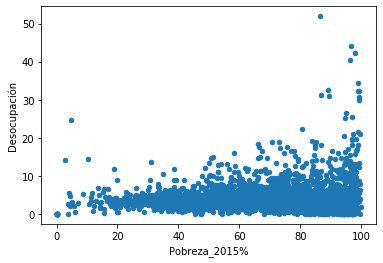

In [23]:
modelo.plot(kind="scatter",x='Pobreza_2015%',y='Desocupación') 


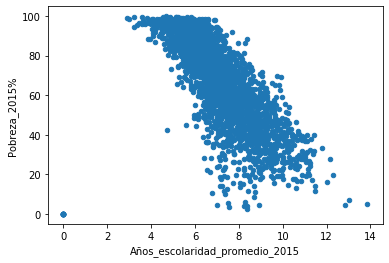

In [24]:
modelo.plot(kind="scatter",x='Años_escolaridad_promedio_2015',y='Pobreza_2015%') 




# Validación 

### threshold = .5

In [60]:
suma_correct = 0
suma_y_1 = 0
threshold = .5
for i in range(2457):
    true_y = modelo['Y'.format()][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 2457)
print(modelo['Y'.format()].sum())
print(suma_y_1)

Fitness: 0.7496947496947497
607
14


### threshold = success rate

In [26]:
suma_correct = 0
suma_y_1 = 0
threshold = modelo['Y'.format()].sum() / 2457
for i in range(2457):
    true_y = modelo['Y'.format()][i]
    y_hat_p = Y_hat_ps[i]
    if y_hat_p >= threshold:
        y_hat = 1
    else:
        y_hat = 0
    if true_y == y_hat:
        suma_correct += 1
    suma_y_1 += y_hat
print('Fitness:', suma_correct / 2457)
print(modelo['Y'.format()].sum())
print(suma_y_1)

Fitness: 0.6145706145706146
607
1094


In [27]:
success_rates = []
for threshold in np.linspace(0, 1, 100):
    suma_correct = 0
    suma_y_1 = 0
    for i in range(2457):
        true_y = modelo['Y'.format()][i]
        y_hat_p = Y_hat_ps[i]
        if y_hat_p >= threshold:
            y_hat = 1
        else:
            y_hat = 0
        if true_y == y_hat:
            suma_correct += 1
        suma_y_1 += y_hat
    success_rate = (suma_y_1) / 2457
    success_rates.append(success_rate)



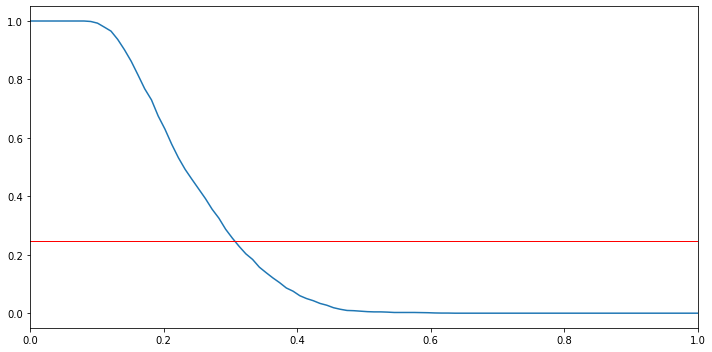


Done!


In [28]:
fig = plt.figure(figsize=(10, 5))
axis = plt.gca()
plt.plot(list(np.linspace(0, 1, 100)), success_rates)
plt.axhline( modelo['Y'.format()].sum() / 2457, color='red', linewidth=1)
plt.xlim(0, 1)
fig.tight_layout()
plt.show()
plt.close(plt.gcf())
print('\nDone!')




C:\Users\luism\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\luism\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


Text(0.5, 0, 'Pobreza_2015%')

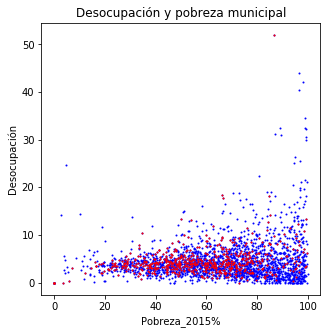

In [29]:
fig=plt.figure(figsize=(5,5))
Y=modelo['Desocupación']
X=modelo['Pobreza_2015%']
X_2=[]
Y_2=[]
for i, x in enumerate(X):
    y_feminicidio=modelo['Y'.format()][i]
    if y_feminicidio== 1:
        X_2.append(x)
        Y_2.append(Y[i])
plt.plot(X,Y ,'o', c='black', markersize=1,color='blue')
plt.plot(X_2,Y_2,'o' ,c='black', markersize=1,color='red')
plt.show

plt.title("Desocupación y pobreza municipal")

plt.ylabel('Desocupación')
plt.xlabel('Pobreza_2015%')


C:\Users\luism\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\luism\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  if sys.path[0] == '':


Text(0.5, 0, 'Años_escolaridad_promedio_2015')

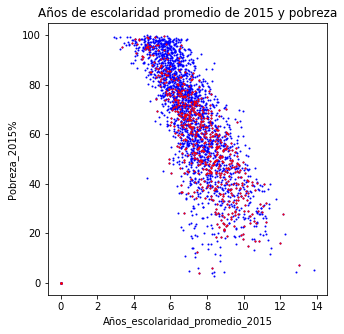

In [30]:
fig=plt.figure(figsize=(5,5))
Y=modelo['Pobreza_2015%']
X=modelo['Años_escolaridad_promedio_2015']
X_2=[]
Y_2=[]
for i, x in enumerate(X):
    y_feminicidio=modelo['Y'.format()][i]
    if y_feminicidio== 1:
        X_2.append(x)
        Y_2.append(Y[i])
plt.plot(X,Y ,'o', c='black', markersize=1,color='blue')
plt.plot(X_2,Y_2,'o' ,c='black', markersize=1,color='red')
plt.show
plt.title("Años de escolaridad promedio de 2015 y pobreza")

plt.ylabel('Pobreza_2015%')
plt.xlabel('Años_escolaridad_promedio_2015')

In [31]:
betas=model.params
betas1= pd.DataFrame(betas)
betas1



,0
const,-1.079125
Pobreza_2015%,-0.018068
Vivienda_jefatura_femenina%,0.028705
Desocupación,0.011933
Años_escolaridad_promedio_2015,0.039262


## DEFINICIÓN DE VARIABLES

In [32]:
def sigmoide_G(x):
    rv = 1 / (1 + np.exp(-x)) 
    return rv

In [33]:

Bo=betas1.loc['const']
B1=betas1.loc['Pobreza_2015%']
B2=betas1.loc['Vivienda_jefatura_femenina%']
B3=betas1.loc['Desocupación']
B4=betas1.loc['Años_escolaridad_promedio_2015']

X1_m=modelo['Pobreza_2015%'].mean()
X2_m=modelo['Vivienda_jefatura_femenina%'].mean()
X3_m=modelo['Desocupación'].mean()
X4_m=modelo['Años_escolaridad_promedio_2015'].mean()


In [34]:
#Valor de la sigmoide
G=sigmoide_G((Bo)+(B1*X1_m)+(B2*X2_m)+(B3*X3_m)+(B4*X4_m)*B1)
G

0    0.188493
dtype: float64

In [35]:
#Efecto parcial de Pobreza
Efecto_pobreza=G*B1
Efecto_pobreza



0   -0.003406
dtype: float64

In [36]:
#Efecto parcial de jefaturas femeninas 
Efecto_Vivienda=G*B2*.10
Efecto_Vivienda


0    0.000541
dtype: float64

In [49]:
#Efecto parcial de la desocupación
Efecto_Desocupación=G*B3

Efecto_Desocupación


0    0.002249
dtype: float64

In [48]:
#Efecto parcial de  de los años de escolaridad promedio
Efecto_escolaridad=G*B4*2
Efecto_escolaridad


0    0.014801
dtype: float64

# PEA

In [39]:

print(model.get_margeff(at="mean").summary())

        Logit Marginal Effects       
Dep. Variable:                      Y
Method:                          dydx
At:                              mean
                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Pobreza_2015%                     -0.0033      0.001     -6.521      0.000      -0.004      -0.002
Vivienda_jefatura_femenina%        0.0052      0.002      3.216      0.001       0.002       0.008
Desocupación                       0.0022      0.002      0.930      0.353      -0.002       0.007
Años_escolaridad_promedio_2015     0.0071      0.007      1.022      0.307      -0.007       0.021


## APE

In [40]:
print("APE",model.get_margeff().summary())

APE         Logit Marginal Effects       
Dep. Variable:                      Y
Method:                          dydx
At:                           overall
                                    dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Pobreza_2015%                     -0.0032      0.000     -6.619      0.000      -0.004      -0.002
Vivienda_jefatura_femenina%        0.0051      0.002      3.222      0.001       0.002       0.008
Desocupación                       0.0021      0.002      0.930      0.352      -0.002       0.007
Años_escolaridad_promedio_2015     0.0070      0.007      1.022      0.307      -0.006       0.020
